In [1]:
import trees
myDat,labels = trees.createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [2]:
trees.calcShannonEnt(myDat)

0.9709505944546686

In [3]:
myDat[0][-1] = 'may be'
myDat

[[1, 1, 'may be'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [4]:
trees.calcShannonEnt(myDat)

1.3709505944546687

In [5]:
trees.splitDataSet(myDat,2,'no')

[[1, 0], [0, 1], [0, 1]]

In [6]:
myDat[0]

[1, 1, 'may be']

In [7]:
featList = [example[2] for example in myDat]
set(featList)

{'may be', 'no', 'yes'}

In [8]:
myDat,labels = trees.createDataSet()
trees.chooseBestFeatureToSplit(myDat)

0

In [9]:
trees.calcShannonEnt(trees.splitDataSet(myDat,2,'no') + trees.splitDataSet(myDat,2,'yes'))

0.7219280948873623

In [10]:
trees.calcShannonEnt(trees.splitDataSet(myDat,1,1) + trees.splitDataSet(myDat,1,0))

0.9709505944546686

In [11]:
trees.calcShannonEnt(trees.splitDataSet(myDat,0,1) + trees.splitDataSet(myDat,0,0))

0.9709505944546686

In [12]:
myTree = trees.createTree(myDat,labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [13]:
myDat,labels = trees.createDataSet()
labels

['no surfacing', 'flippers']

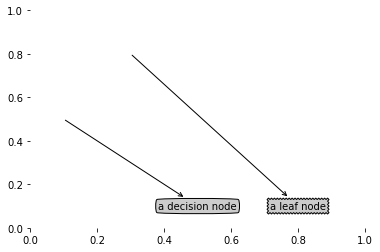

In [14]:
import treePlotter
treePlotter.createPlot1()

In [15]:
exTree = treePlotter.retrieveTree(0)
exTree['no surfacing'][3] = 'may be'
exTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'may be'}}

In [16]:
treePlotter.getNumLeafs(exTree)

4

In [17]:
treePlotter.getTreeDepth(exTree)

2

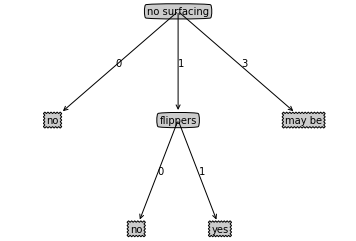

In [18]:
treePlotter.createPlot(exTree)

In [19]:
trees.classify(exTree,labels,[0,0])

'no'

In [20]:
trees.storeTree(exTree,'decisionTree1.txt')

In [21]:
trees.grabTree('decisionTree1.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'may be'}}

In [23]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age','prescript','astigmatic','tearRate']
lensesTree = trees.createTree(lenses,lensesLabels)
lensesTree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

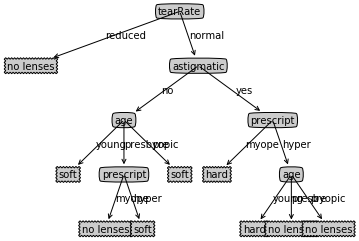

In [25]:
treePlotter.createPlot(lensesTree)

In [28]:
lensesLabels = ['age','prescript','astigmatic','tearRate']
trees.classify(lensesTree,lensesLabels,['young','myope','no','reduced'])

'no lenses'